<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Redes Neurais Artificiais: Risco de Doença Cardíaca

[Cleveland Clinic Foundation](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

## Importação das bibliotecas

In [24]:
# Pacotes de preparação dos dados
import numpy as np
import pandas as pd
import scipy

# Pacotes gráficos
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de modelagem
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
from tensorflow import keras
from tensorflow.keras import layers

# Funções customizadas
import preditiva

## Importação da base de dados

In [25]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
df = pd.read_csv(file_url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


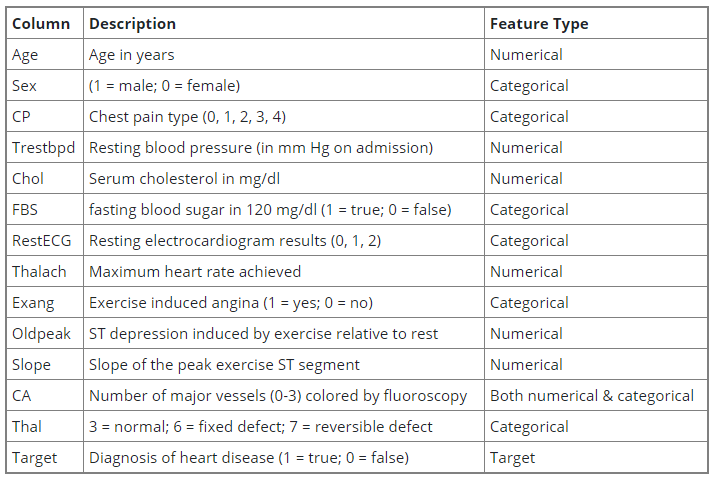

## Preparação dos Dados

### Missing Values

In [26]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Duplicações

In [27]:
df.duplicated().sum()

0

### Tipos de Variáveis

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [29]:
# Conversão de variáveis numéricas em categóricas
df['cp'] = df['cp'].astype(object)
df['restecg'] = df['restecg'].astype(object)
df['ca_cat'] = df['ca'].astype(object)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
 14  ca_cat    303 non-null    object 
dtypes: float64(1), int64(10), object(4)
memory usage: 35.6+ KB


## Análise Exploratória dos Dados

### Dispersão por Classe

C:\Users\Thiago\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


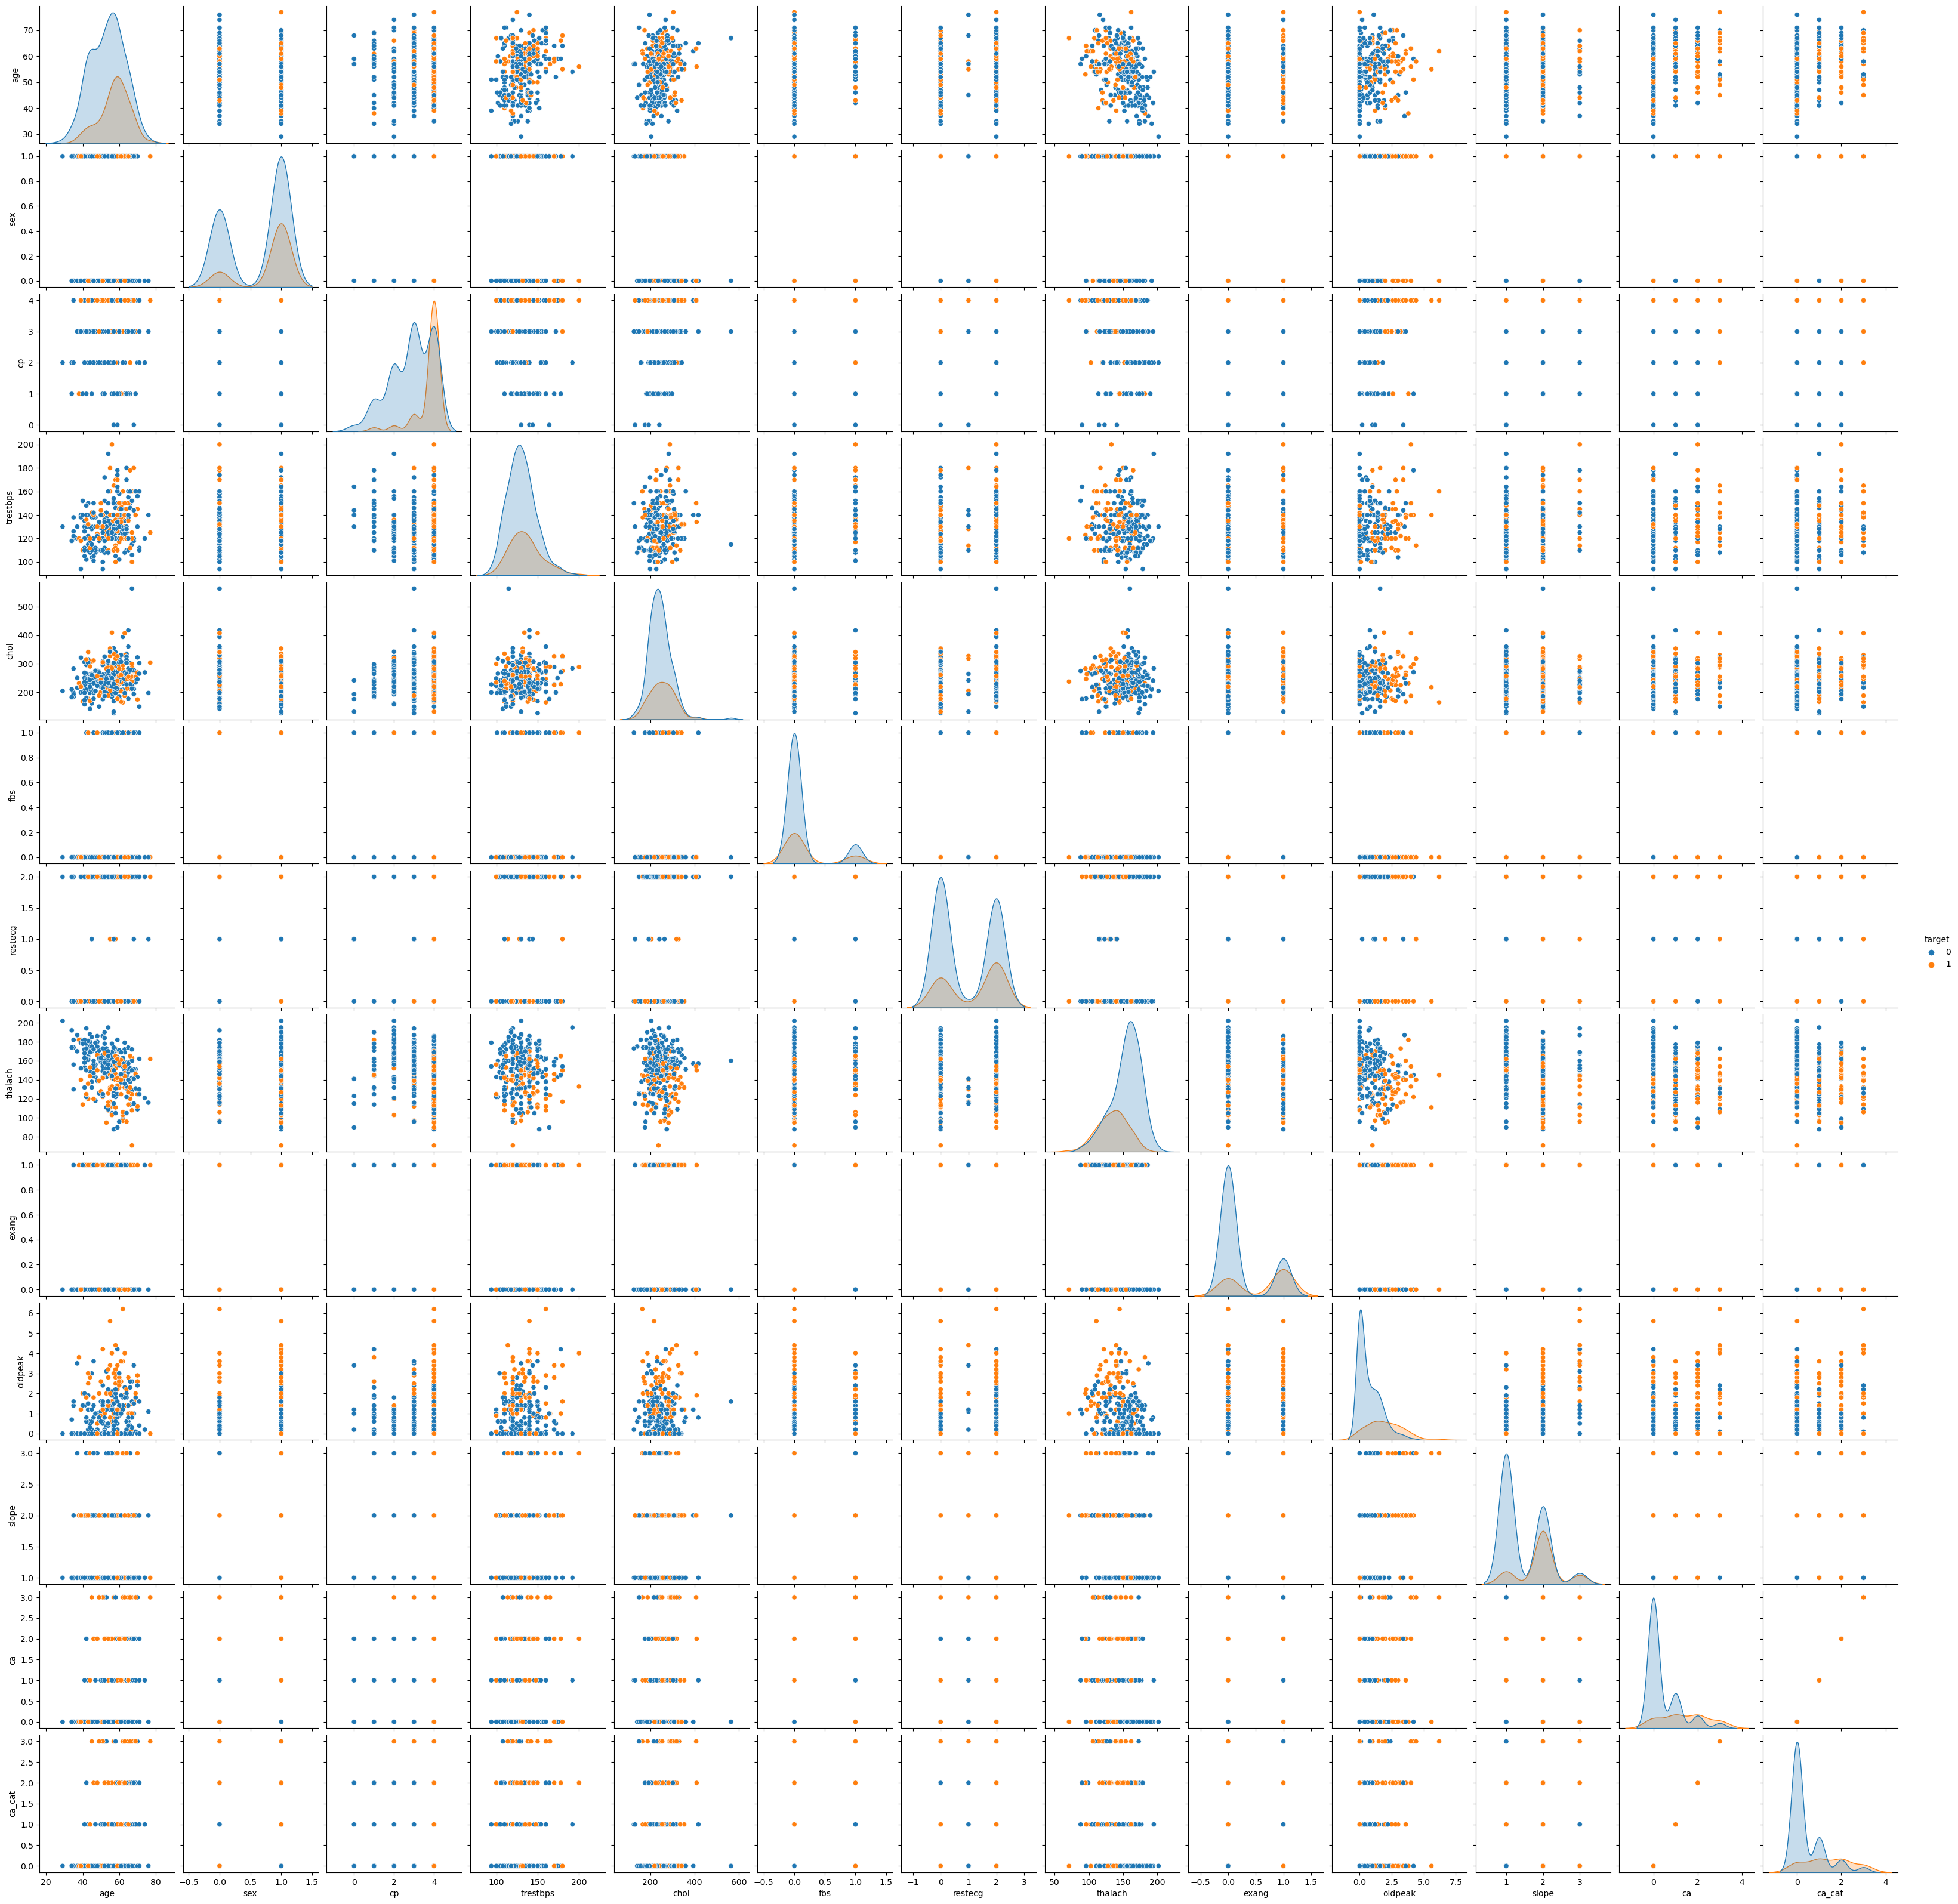

In [31]:
matplotlib.use('module://ipykernel.pylab.backend_inline')
sns.pairplot(df, hue='target');

### Relatórios Pandas Profiling e SweetViz

In [32]:
perfil_pp, perfil_sv = preditiva.gera_relatorios_aed(df=df,
                                                     target_feat='target')
sns.reset_defaults()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |          | [  0%]   00:00 -> (? left)

Report base_aed_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Desenvolvimento dos Modelos
Para desenvolvermos as Redes Neurais Artificiais utilizaremos uma das bibliotecas mais populares: [Tensorflow](https://www.tensorflow.org/?hl=pt-br)

### Definição do *Target* e das *Features*

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
 14  ca_cat    303 non-null    object 
dtypes: float64(1), int64(10), object(4)
memory usage: 35.6+ KB


In [36]:
# Target (variável resposta)
y_var = 'target' # nome da variável de interesse
y = df[y_var] # recebe a lista de valores de target

# Features (variáveis explicativas)
# Variáveis Numéricas
x_var_num = [
    'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach',
     'exang', 'oldpeak', 'slope', 'ca',
    ]
x_num = df[x_var_num].to_numpy() # converte as colunas para um array numpy

# Variáveis Categóricas / Qualitativas
x_var_cat = ['cp', 'restecg', 'thal', 'ca_cat']
x_cat = df[x_var_cat] # dataframe com as colunas selecionadas

### Pré-processamento

In [37]:
x_cat

,cp,restecg,thal,ca_cat
0,1,2,fixed,0
1,4,2,normal,3
2,4,2,reversible,2
3,3,0,normal,0
4,2,2,normal,0
...,...,...,...,...
298,1,2,fixed,0
299,4,2,reversible,0
300,4,2,reversible,1
301,4,2,reversible,2


In [38]:
# Criação das variáveis dummies para variáveis categóricas
x_cat_enc = OneHotEncoder() # Criando o objeto 
x_cat = x_cat_enc.fit_transform(x_cat).toarray() # ajusta e transforma

# Unificação da base de dados
x = np.concatenate([x_num, x_cat], axis=1)

In [39]:
x.shape

(303, 27)

### Divisão das bases em Treino e Teste

In [40]:
# Divisão em treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30,
                                                    random_state=42)

### Padronização da Escala

In [41]:
# Padronização da Escala usando conjunto de treino
x_scaler = StandardScaler()
x_scaler.fit(x_train)
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

### Definição da RNA MLP

In [46]:
x_train_scaled.shape

(212, 27)

In [47]:
y_train.shape

(212,)

In [49]:
model = keras.Sequential() # criação de um modelo sequencial onde cada camada se comunica apenas com a anterior ou posterior 

# Camada Oculta 1
# Para o MLP sempre usaremos o dense
model.add(layers.Dense(4, # número de neurônios 
                       activation='tanh', # tangente hiperbólica
                       kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01), # regularizadores L1 e L2
                       input_dim=x_train_scaled.shape[1]))
model.add(layers.Dropout(0.2)) # Desativa aleatoriamente alguns neurônios

# Camada Oculta 2
model.add(layers.Dense(8, 
                       activation='relu', 
                       kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01),
                       input_dim=x_train_scaled.shape[1]))
model.add(layers.Dropout(0.1))


# Camada Saída
model.add(layers.Dense(1, activation='sigmoid')) # só temos uma saída na rede neural, sigmoide indicado para classificação

# Compilação do Modelo
model.compile(loss='binary_crossentropy', # o tensor flow vai minimizar a loss, usamos auc para ficar mais interpretável
              optimizer=keras.optimizers.Adam(),
              metrics=[keras.metrics.AUC(name='auc')])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 4)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
(27*4)+4

112

In [23]:
(4*1)+1

5

### Avaliação da RNA antes do treinamento

In [51]:
score_train, metric_train = model.evaluate(x_train_scaled, y_train, verbose=0) # escala padronizada
score_test, metric_test = model.evaluate(x_test_scaled, y_test, verbose=0) # escala padronizada

print('AUC no conjunto de Treino: {:.1%}'.format(metric_train))
print('AUC no conjunto de Teste: {:.1%}'.format(metric_test))

AUC no conjunto de Treino: 51.1%
AUC no conjunto de Teste: 49.3%


### Treinamento da RNA MLP

In [27]:
(212*0.9)/8

23.85

In [52]:
rna_es = tf.keras.callbacks.EarlyStopping(
    monitor="val_auc", # métrica que eu desejo melhorar
    min_delta=0.01, # o mínimo que o auc precisa melhorar
    patience = 20, # se for menos de 1% espere até 20 épocas
    verbose=2, # saber as informações
    mode='max', # maximizar o auc
    restore_best_weights=True) # depois que parar porque não conseguiu melhorar, volta para a melhor época

historico = model.fit(x=x_train_scaled, 
                      y=y_train,
                      epochs=50, # Quantas vezes vou passar pelo conjunto de dados inteiro
                      batch_size=8, # grupo de quantas observações os pesos serão atualizados
                      validation_split=0.1, # Separado 10% dos 70% para validação
                      verbose=1,
                      callbacks=[rna_es]) 

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.5457 - loss: 1.1210 - val_auc: 0.4000 - val_loss: 1.1293
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6143 - loss: 1.0724 - val_auc: 0.4471 - val_loss: 1.0789
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6519 - loss: 1.0407 - val_auc: 0.4941 - val_loss: 1.0372
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7050 - loss: 1.0193 - val_auc: 0.6118 - val_loss: 0.9940
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7589 - loss: 0.9780 - val_auc: 0.6588 - val_loss: 0.9549
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8548 - loss: 0.8897 - val_auc: 0.7000 - val_loss: 0.9154
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8580 - loss: 0.8646 - val_auc: 0.7706 - val_loss: 0.8784
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8607 - loss: 0.8264 - val_auc: 0.7824 - val_loss: 0.8447
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9450 - loss: 

### Análise de Desempenho

In [53]:
score_train, metric_train = model.evaluate(x_train_scaled, y_train, verbose=0)
score_test, metric_test = model.evaluate(x_test_scaled, y_test, verbose=0)

print('AUC no conjunto de Treino: {:.1%}'.format(metric_train))
print('AUC no conjunto de Teste: {:.1%}'.format(metric_test))

AUC no conjunto de Treino: 93.8%
AUC no conjunto de Teste: 91.1%


In [54]:
historico.history.keys()

dict_keys(['auc', 'loss', 'val_auc', 'val_loss'])

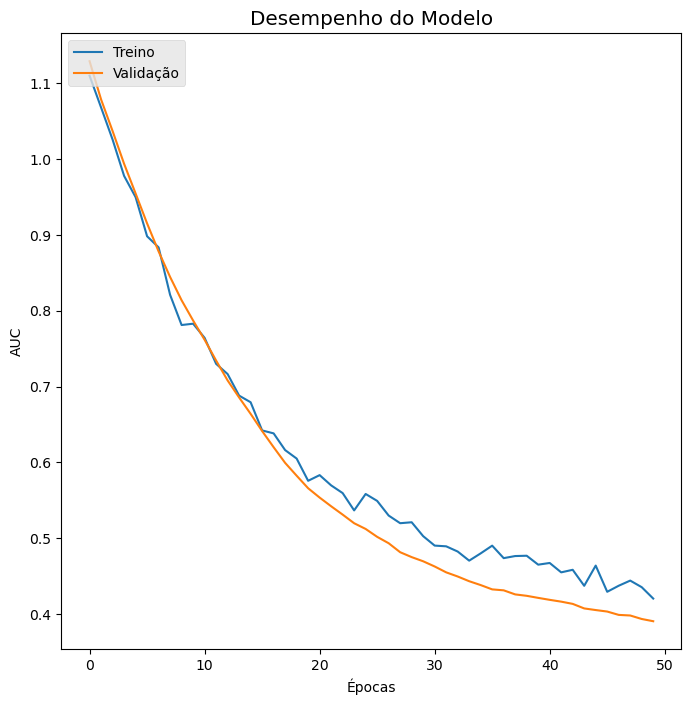

In [55]:
auc_treino = list(historico.history.keys())[1]
auc_valid = list(historico.history.keys())[3]

# Gráfico com a evolução do treinamento
matplotlib.use('module://ipykernel.pylab.backend_inline')
fig, ax = plt.subplots(figsize=(8, 8))
plt.style.use('ggplot')
plt.plot(historico.history[auc_treino])
plt.plot(historico.history[auc_valid])
plt.title('Desempenho do Modelo')
plt.ylabel('AUC')
plt.xlabel('Épocas')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()